# Machine Learning Model for the Planetary Albedo

The goal of the project is to use machine learning techniques to identify relationships between planetary mapped datasets, with the goal of providing deeper understanding of planetary surfaces and to have predictive power for planetary surfaces with incomplete datasets.

### Mentors
*   Patrick Peplowski (JHUAPL)
*   Sergei Gleyzer (University of Alabama)
*   Jason Terry (University of Georgia

 # Table of Contents
 * [Task-1: Predicting the Lunar Albedo of Moon based on Chemical Composition](#task1)
 
     * [Data Loading](#dl11)
     * [Data Wrangling](#dw11)
     * [Data Preparation](#dp11)
     
     * [Applying Machine Learning](#ml11)
          * [Approach-1: Directly Applying Machine Learning Model](#ap11)
              * [Best 3 Models](#bm11)
          * [Approach-2: Applying Machine Learning After Transpose](#ap12)
          * [Approach-3: Applying Machine Learning After Dividing the Data](#ap13)
     * [Predicting the Result](#pr11)
          * [Using Thorium](#th11)
          * [Using Titanium](#ti11)   
          * [Using Iron](#fe)
          * [Using Potassium](#k)
     * [Overall Result of Task-1](#rr11)

 * [Task-2](#task2)
 
     * [Data Loading](#dl21)
     * [Data Wrangling](#dw21)
     * [Data Preparation](#dw21)
     * [Predicting the Result](#pr21)
          * [alsimap_smooth (Al to Si element ratio)](#alsi)
          * [casimap_smooth (Ca to Si element ratio)](#casi)   
          * [fesimap_smooth (Fe to Si element ratio)](#fesi)
          * [mgsimap_smooth (Mg to Si element ratio)](#mgsi)
          * [ssimap_smooth (S to Si element ratio)](#ssi)

     * [Overall Result of Task-2](#rr21)
 * [Problem Faced](#q)

<a id="task1"></a>
# Task 1. Predicting the Lunar Albedo of Moon based on Chemical Composition

Using the data found in ML4SCI_GSoC/Messenger/Moon/, select a subset of the Moons surface to train your model to identify relationship between albedo and composition. Then, make a prediction about the albedo of the untrained portion of the map using just the chemical data.Compare your albedo prediction to the albedo map. How did your algorithm perform? Choose a metric to quantify your performance.

The albedo map, LPFe (iron map), LPK (potassium map), LPTh (thorium map), and LPTi (titanium) map should be used for this study. The maps are csv files with data that represents the element concentration at each location. Make sure you can reproduce
the maps above to verify you are reading the data correctly.

<a id="dl11"></a>
## Data Loading 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sb
import warnings

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
albedodf = pd.read_csv('Albedo_Map.csv',header = None)

In [3]:
albedodf.head(3)

0         1         2         3         4         5         6    \
0  0.331936  0.332611  0.332240  0.331028  0.331094  0.332614  0.331964   
1  0.338990  0.340417  0.334623  0.333716  0.331404  0.331733  0.335648   
2  0.324930  0.325832  0.328177  0.325871  0.321231  0.321791  0.322595   

        7         8         9    ...       710       711       712       713  \
0  0.329994  0.327853  0.326532  ...  0.330389  0.329089  0.330334  0.333719   
1  0.335849  0.333166  0.332413  ...  0.350386  0.346509  0.341890  0.345887   
2  0.325254  0.329132  0.325335  ...  0.329577  0.332204  0.330471  0.330105   

        714       715       716       717       718       719  
0  0.334709  0.334640  0.332491  0.334664  0.332983  0.331635  
1  0.345619  0.344203  0.345772  0.341238  0.342606  0.338984  
2  0.331836  0.335386  0.335075  0.333190  0.327436  0.330122  

[3 rows x 720 columns]

In [4]:
albedodf.shape

(360, 720)

In [5]:
def plotcolormap(df,title='ColorMap',patch=False):
    """
    This function plot the Lunar of the csv
    input:
        df:DataFrame to produce map
        title:title of the map
        patch:False/True for showing  rectangle patch
    ouput:
        return:None
    """
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    if(patch==True):
        rect = patches.Rectangle((200,50),200,150, edgecolor='r', facecolor="none")
        ax.add_patch(rect)
    plt.imshow(df);

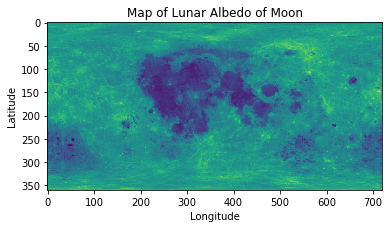

In [6]:
plotcolormap(albedodf,'Map of Lunar Albedo of Moon')

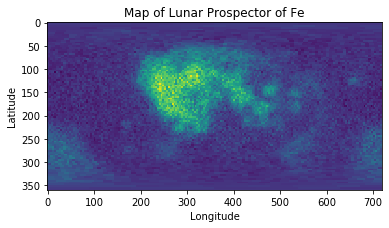

In [7]:
#Lunar Prospector of Fe
lpfe = pd.read_csv('LPFe_Map.csv',header = None)
plotcolormap(lpfe,'Map of Lunar Prospector of Fe')

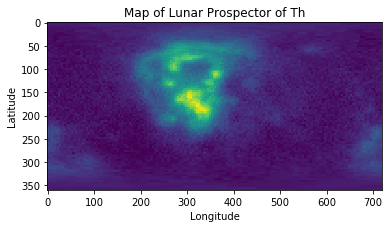

In [8]:
#Lunar Prospector of Th
lpth = pd.read_csv('LPTh_Map.csv',header = None)
plotcolormap(lpth,'Map of Lunar Prospector of Th')

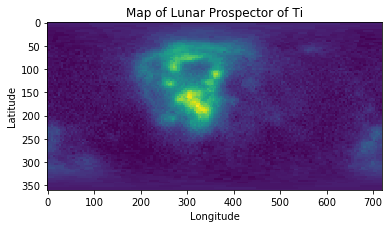

In [9]:
#Lunar Prospector of Ti
lpti = pd.read_csv('LPTi_Map.csv',header = None)
plotcolormap(lpth,'Map of Lunar Prospector of Ti')

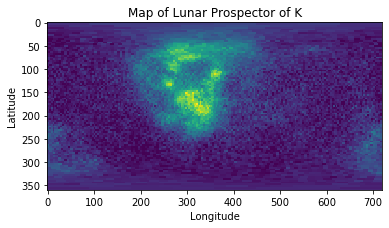

In [10]:
#Lunar Prospector of K
lpk = pd.read_csv('LPK_Map.csv',header = None)
plotcolormap(lpk,'Map of Lunar Prospector of K')

<a id="dw11"></a>
## Data Wrangling

All the Lunar Prospector of chemical data have a same centralised where region where the concentration is high and infact the lunar albedo of moon also shows high Intensity.

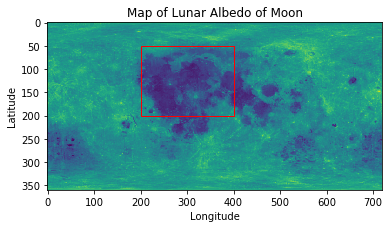

In [11]:
plotcolormap(albedodf,'Map of Lunar Albedo of Moon',patch =True)

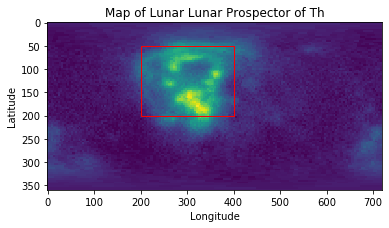

In [12]:
plotcolormap(lpth,'Map of Lunar Lunar Prospector of Th',patch =True)

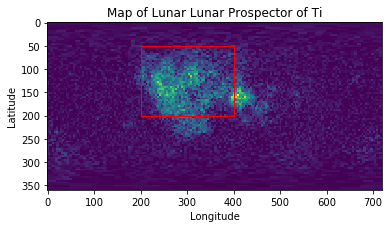

In [13]:
plotcolormap(lpti,'Map of Lunar Lunar Prospector of Ti',patch =True)

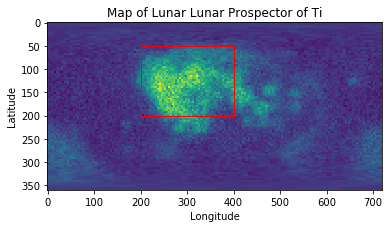

In [14]:
plotcolormap(lpfe,'Map of Lunar Lunar Prospector of Ti',patch =True)

<b>I choose Thorium as to make prediction about the lunar albedo as these two maps are highly co related and with small dataset thorium will give better results then any other chemical.</b>

<a id="dp11"></a>
## Data Preparation

In [15]:
print(lpth.isnull().sum().sum())
print(albedodf.isnull().sum().sum())

0
0


In [16]:
print(lpth.values.max())
print(lpth.values.min())

11.644
0.003663


In [17]:
print(albedodf.values.max())
print(albedodf.values.min())

0.50656
0.0968975


i used Scaling to Normalize the Between [0,1]

In [18]:
#Scaling values between [0,1]
def min_max_scaling(df):
    """It scales every value of dataframe between[0,1]
    input:Dataframe
    return:None
    """
    for column in df.columns:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    print("Current max value: ",df.values.max())
    print("Current min value: ",df.values.min())
min_max_scaling(lpth)
min_max_scaling(albedodf)

Current max value:  1.0
Current min value:  0.0
Current max value:  1.0
Current min value:  0.0


<a id="ml11"></a>
## Applying Machine Learning Models

<a id="ap11"></a>
### Approach 1 : Directly Applying Machine Learning Model

In this Approach i used the Scaled dataset to make prediction and i have used 8 Models for this:

* Ridge Regressor
* DecisionTreeRegressor
* KNeighborsRegressor
* Lasso Regressor
* ElasticNet Regressor
* ExtraTreesRegressor
* RandomForestRegressor
* AdaBoostRegressor

In [19]:
X_train, X_test, y_train, y_test = train_test_split(lpth, albedodf, test_size=0.3, random_state=42)

In [20]:
def evaluate_model(model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    """
    This function take Regressor model as input, fit the model , gives the r2 score,mean Squared Error 
    and Mean Absolute Error and return predictions.
    input:
        model:the regressor
        X_train: Albedo training data
        y_train: Chemical training data
        X_test:  Albedo testing data
        y_test:  Chemical testing data
    return:predictions
    """
    #fit the model
    model.fit(X_train,y_train)
    #prediction from the model
    pred = model.predict(X_test)
    #score of models
    r2score = r2_score(y_test,pred)
    mse =mean_squared_error(y_test,pred)
    mae =mean_absolute_error(y_test,pred)
    print('The r-squared score of the model is ',r2score)
    print('The mean squared error is',mse)
    print('The mean absolute error is',mae)
    return pred

In [21]:
reg = Ridge(alpha=1.0)
evaluate_model(reg)

The r-squared score of the model is  0.8206784847550181
The mean squared error is 0.005892834710396798
The mean absolute error is 0.0550506665220026


array([[0.50514422, 0.49458489, 0.51552166, ..., 0.4424673 , 0.50928775,
        0.47496572],
       [0.67346122, 0.69105627, 0.67280473, ..., 0.73127988, 0.72651785,
        0.71465887],
       [0.3519475 , 0.212916  , 0.37955839, ..., 0.37336505, 0.4446236 ,
        0.34238651],
       ...,
       [0.50514422, 0.49458489, 0.51552166, ..., 0.4424673 , 0.50928775,
        0.47496572],
       [0.73816847, 0.75714566, 0.75506912, ..., 0.74526562, 0.76771687,
        0.76147756],
       [0.26512149, 0.07617013, 0.14320378, ..., 0.27317093, 0.39069052,
        0.232629  ]])

In [22]:
reg = DecisionTreeRegressor()
evaluate_model(reg)

The r-squared score of the model is  0.8111417388195891
The mean squared error is 0.006176943623503447
The mean absolute error is 0.05572576802012568


array([[0.49293589, 0.49085698, 0.51322212, ..., 0.43101277, 0.4897868 ,
        0.46018553],
       [0.65998981, 0.68397072, 0.64543671, ..., 0.74328766, 0.73154141,
        0.71282355],
       [0.35941868, 0.19430207, 0.4069136 , ..., 0.39243046, 0.46376305,
        0.33759359],
       ...,
       [0.49293589, 0.49085698, 0.51322212, ..., 0.43101277, 0.4897868 ,
        0.46018553],
       [0.83798652, 0.87833988, 0.87610627, ..., 0.83058375, 0.84272248,
        0.8584975 ],
       [0.26154054, 0.07004162, 0.13962887, ..., 0.2775469 , 0.39307847,
        0.23092252]])

In [23]:
reg = KNeighborsRegressor()
evaluate_model(reg)

The r-squared score of the model is  0.7759683695406576
The mean squared error is 0.007370285815624743
The mean absolute error is 0.062097094384140475


array([[0.49123676, 0.4332101 , 0.46938492, ..., 0.41628508, 0.47631353,
        0.48614768],
       [0.65063671, 0.67222722, 0.65974451, ..., 0.71258511, 0.7280384 ,
        0.70132047],
       [0.38975274, 0.26212056, 0.38356382, ..., 0.33524167, 0.41172332,
        0.36029093],
       ...,
       [0.49123676, 0.4332101 , 0.46938492, ..., 0.41628508, 0.47631353,
        0.48614768],
       [0.83996747, 0.8759814 , 0.8521089 , ..., 0.83840768, 0.84525995,
        0.86281636],
       [0.28226291, 0.09766403, 0.17188582, ..., 0.24895516, 0.36987698,
        0.24304934]])

In [24]:
reg = Lasso()
evaluate_model(reg)

The r-squared score of the model is  -0.01510735332710171
The mean squared error is 0.04502023898241168
The mean absolute error is 0.16810017452922182


array([[0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ],
       [0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ],
       [0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ],
       ...,
       [0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ],
       [0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ],
       [0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ]])

In [25]:
reg = MultiOutputRegressor(ElasticNet())
evaluate_model(reg)

The r-squared score of the model is  -0.015107353327101706
The mean squared error is 0.04502023898241168
The mean absolute error is 0.1681001745292218


array([[0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ],
       [0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ],
       [0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ],
       ...,
       [0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ],
       [0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ],
       [0.60033034, 0.58656015, 0.59846991, ..., 0.60307361, 0.64124228,
        0.6140602 ]])

In [26]:
reg = ExtraTreesRegressor()
evaluate_model(reg)

The r-squared score of the model is  0.8111417388195892
The mean squared error is 0.0061769436235034475
The mean absolute error is 0.05572576802012568


array([[0.49293589, 0.49085698, 0.51322212, ..., 0.43101277, 0.4897868 ,
        0.46018553],
       [0.65998981, 0.68397072, 0.64543671, ..., 0.74328766, 0.73154141,
        0.71282355],
       [0.35941868, 0.19430207, 0.4069136 , ..., 0.39243046, 0.46376305,
        0.33759359],
       ...,
       [0.49293589, 0.49085698, 0.51322212, ..., 0.43101277, 0.4897868 ,
        0.46018553],
       [0.83798652, 0.87833988, 0.87610627, ..., 0.83058375, 0.84272248,
        0.8584975 ],
       [0.26154054, 0.07004162, 0.13962887, ..., 0.2775469 , 0.39307847,
        0.23092252]])

In [27]:
reg = RandomForestRegressor()
evaluate_model(reg)

The r-squared score of the model is  0.8283231480670221
The mean squared error is 0.005661856441803238
The mean absolute error is 0.05420717615982611


array([[0.48381448, 0.44733828, 0.47259357, ..., 0.42026473, 0.48012425,
        0.45738394],
       [0.66910607, 0.68931802, 0.65237249, ..., 0.75034497, 0.74046857,
        0.72345587],
       [0.38479645, 0.2397086 , 0.39828887, ..., 0.38179699, 0.46610193,
        0.35895904],
       ...,
       [0.48381448, 0.44733828, 0.47259357, ..., 0.42026473, 0.48012425,
        0.45738394],
       [0.81189777, 0.84406186, 0.83747186, ..., 0.81625644, 0.82720313,
        0.83460204],
       [0.27022579, 0.08986812, 0.15789367, ..., 0.27539635, 0.38927052,
        0.23921427]])

In [28]:
reg = MultiOutputRegressor(AdaBoostRegressor(n_estimators=10))
evaluate_model(reg)

The r-squared score of the model is  0.7803242052729248
The mean squared error is 0.007257742399143578
The mean absolute error is 0.06372099860263339


array([[0.49853793, 0.44985924, 0.47627312, ..., 0.4084617 , 0.47467547,
        0.42883625],
       [0.67316662, 0.71634502, 0.7012054 , ..., 0.69610995, 0.74307074,
        0.71243783],
       [0.38563909, 0.27296238, 0.38878847, ..., 0.4084617 , 0.48574394,
        0.3713055 ],
       ...,
       [0.49853793, 0.44985924, 0.47627312, ..., 0.4084617 , 0.47467547,
        0.42883625],
       [0.76404429, 0.81174405, 0.71126433, ..., 0.71606915, 0.74307074,
        0.86763385],
       [0.30229231, 0.10686066, 0.15479463, ..., 0.30413334, 0.39682606,
        0.29261371]])

<a id="bm11"></a>
### Best 3 Models

The 3 best models out of 8:
*     RandomForestRegressor    r2score:0.8241
*     Ridge Regressor          r2score:0.8206
*     DecisionTreeRegressor    r2score:0.8111

Random Forest Regressor
The r-squared score of the model is  0.8238482838633492
The mean squared error is 0.005822374493894232
The mean absolute error is 0.05491695938369157


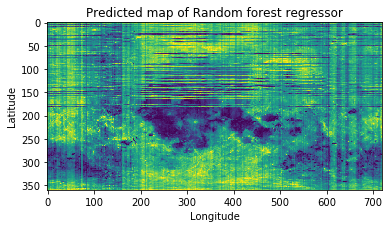

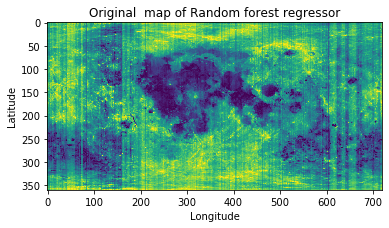

In [29]:
print("Random Forest Regressor")
#initalize the model
reg = RandomForestRegressor()
#getting predictions 
y_pred = evaluate_model(reg)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction,'Predicted map of Random forest regressor')
plotcolormap(original,'Original  map of Random forest regressor')

Ridge Regressor
The r-squared score of the model is  0.8206784847550181
The mean squared error is 0.005892834710396798
The mean absolute error is 0.0550506665220026


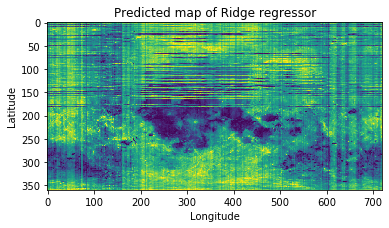

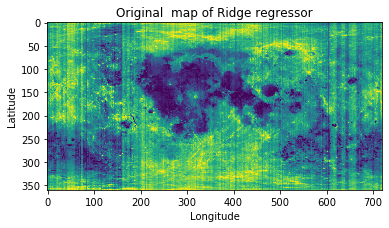

In [30]:
print("Ridge Regressor")
#initalize the model
reg = Ridge(alpha=1.0)
#getting predictions 
y_pred = evaluate_model(reg)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction,'Predicted map of Ridge regressor')
plotcolormap(original,'Original  map of Ridge regressor')

Decision Tree Regressor
The r-squared score of the model is  0.8111417388195891
The mean squared error is 0.006176943623503447
The mean absolute error is 0.05572576802012568


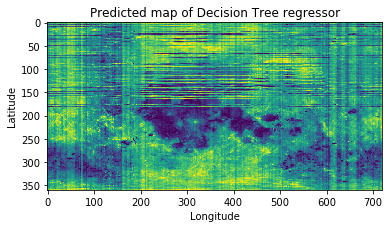

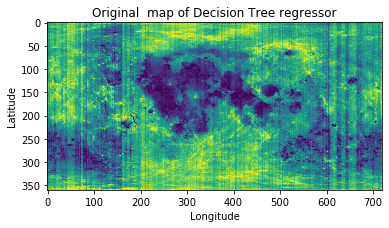

In [31]:
print("Decision Tree Regressor")
#initalize the model
reg = DecisionTreeRegressor()
#getting predictions 
y_pred = evaluate_model(reg)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction,'Predicted map of Decision Tree regressor')
plotcolormap(original,'Original  map of Decision Tree regressor')

<b>As we have scaled the data that's why are original data has changed.These three Regressor have almost same output.</b>

<a id="ap12"></a>
### Approach-2 : Applying Machine Learning After Transpose

As the features are not actually features these are length so i transpose the data while training the Machine Learning and While creating maps i will transpose them again.

* Not doing the Scaling this time just the original dataset.
* Using the Previous Best three model

In [32]:
lpth = pd.read_csv('LPTh_Map.csv',header = None)
albedodf = pd.read_csv('Albedo_Map.csv',header = None)

In [33]:
print("Previous Shape: ",lpth.shape)
lpth = lpth.transpose()
print("New Shape:",lpth.shape)

Previous Shape:  (360, 720)
New Shape: (720, 360)


In [34]:
print("Previous Shape: ",albedodf.shape)
albedodf = albedodf.transpose()
print("New Shape:",albedodf.shape)

Previous Shape:  (360, 720)
New Shape: (720, 360)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(lpth, albedodf, test_size=0.3, random_state=42)

Ridge Regressor
The r-squared score of the model is  0.7583316312546846
The mean squared error is 0.0004236019095237334
The mean absolute error is 0.015253319996480918


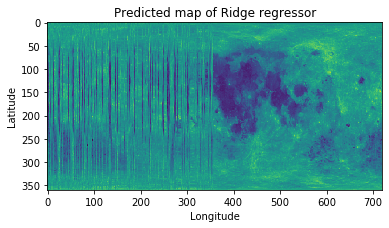

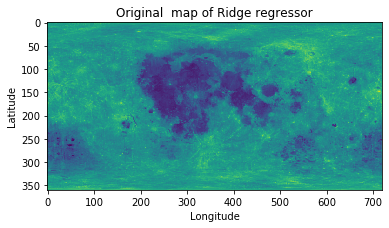

In [36]:
print("Ridge Regressor")
#initalize the model
reg = Ridge(alpha=1.0)
#getting predictions
y_pred = evaluate_model(reg,X_train,y_train,X_test,y_test)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction.transpose(),'Predicted map of Ridge regressor')
plotcolormap(original.transpose(),'Original  map of Ridge regressor')

Random Forest Regressor
The r-squared score of the model is  0.8918946519734852
The mean squared error is 0.0001690164860577503
The mean absolute error is 0.009147302069384204


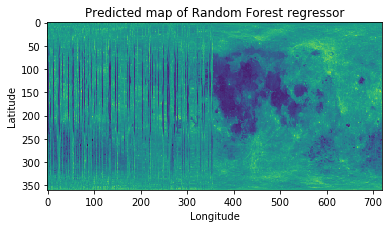

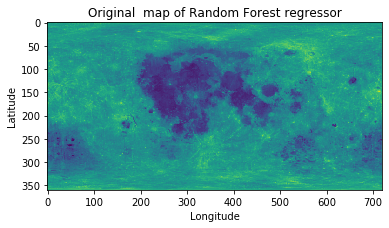

In [37]:
print("Random Forest Regressor")
#initalize the model
reg = RandomForestRegressor(random_state=42)
#getting predictions
y_pred = evaluate_model(reg,X_train,y_train,X_test,y_test)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction.transpose(),'Predicted map of Random Forest regressor')
plotcolormap(original.transpose(),'Original  map of Random Forest regressor')

Decision Tree Regressor
The r-squared score of the model is  0.8452233079604634
The mean squared error is 0.0002504941314241791
The mean absolute error is 0.010588625085733883


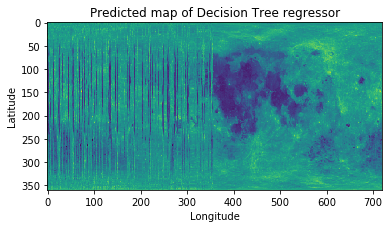

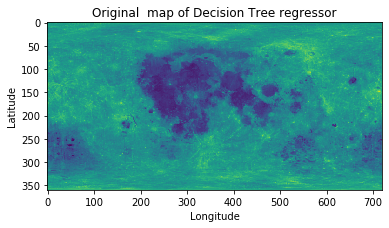

In [38]:
print("Decision Tree Regressor")
#initalize the model
reg = DecisionTreeRegressor()
#getting predictions
y_pred = evaluate_model(reg,X_train,y_train,X_test,y_test)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction.transpose(),'Predicted map of Decision Tree regressor')
plotcolormap(original.transpose(),'Original  map of Decision Tree regressor')

<a id="ap13"></a>
### Approach-3: Applying Machine Learning After Dividing the Data

In this Approach i will divide the Longitude in pieces and then combine the Overall Result.

In [39]:
lpth = pd.read_csv('LPTh_Map.csv',header = None)
albedodf = pd.read_csv('Albedo_Map.csv',header = None)

In [40]:
lpth = lpth.iloc[:,:50]
albedodf = albedodf.iloc[:,:50]

In [41]:
print(lpth.shape)
print(albedodf.shape)

(360, 50)
(360, 50)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(lpth, albedodf, test_size=0.3, random_state=42)

Random Forest Regressor
The r-squared score of the model is  0.8482427941049103
The mean squared error is 0.00030380483438507586
The mean absolute error is 0.012862481367150475


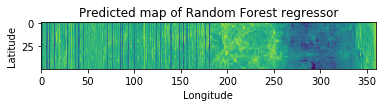

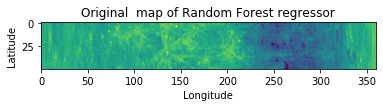

In [43]:
print("Random Forest Regressor")
#initalize the model
reg = RandomForestRegressor(random_state=42)
#getting predictions
y_pred = evaluate_model(reg,X_train,y_train,X_test,y_test)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction.transpose(),'Predicted map of Random Forest regressor')
plotcolormap(original.transpose(),'Original  map of Random Forest regressor')

Ridge Regressor
The r-squared score of the model is  0.6551948054956975
The mean squared error is 0.0006926786419496901
The mean absolute error is 0.020506585243798777


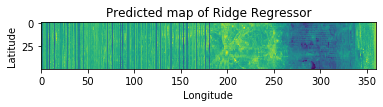

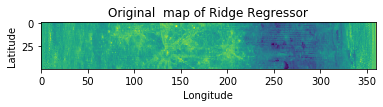

In [44]:
print("Ridge Regressor")
#initalize the model
reg = Ridge(alpha=1.0)
#getting predictions
y_pred = evaluate_model(reg,X_train,y_train,X_test,y_test)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction.transpose(),'Predicted map of Ridge Regressor')
plotcolormap(original.transpose(),'Original  map of Ridge Regressor')

Decision Tree Regressor
The r-squared score of the model is  0.8455838441410823
The mean squared error is 0.0003101122951446502
The mean absolute error is 0.012948406851851852


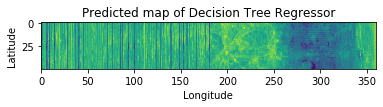

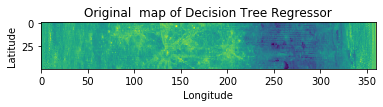

In [45]:
print("Decision Tree Regressor")
#initalize the model
reg = DecisionTreeRegressor()
#getting predictions
y_pred = evaluate_model(reg,X_train,y_train,X_test,y_test)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction.transpose(),'Predicted map of Decision Tree Regressor')
plotcolormap(original.transpose(),'Original  map of Decision Tree Regressor')

There is no such large Effect on performance (r2-score) so i am not going forward in this Approach.

<a id="pr11"></a>
## Predicting the Result
Random forest Regressor found to best and the best resulting image is when we transpose the give image to the machine Learning then retranspose it to get the required result.The best model has an r2 score of 0.8912.

In [46]:
def plot_histogram(y_pred,y_test,title=''):
    """
    It plots the histogram and shows the difference of Original Image and Predicted Image.
    input:
        y_pred : prediction of Pixel values
        y_test: Original Pixel values
        title : title of the plot
    output:
        return: None
    """
    pred_diff = (y_pred - y_test).to_numpy().flatten()
    hist, bin_edges = np.histogram(pred_diff);
    plt.hist(pred_diff, bins='auto');
    plt.xlabel("Difference in Prediction")
    plt.ylabel("Number of Features")
    plt.title("Prediction Result Difference from Original in "+str(title))

<a id="th11"></a>
### Using Thorium

Previous Shape:  (360, 720)
New Shape: (720, 360)
Previous Shape:  (360, 720)
New Shape: (720, 360)
The r-squared score of the model is  0.8918946519734852
The mean squared error is 0.0001690164860577503
The mean absolute error is 0.009147302069384204


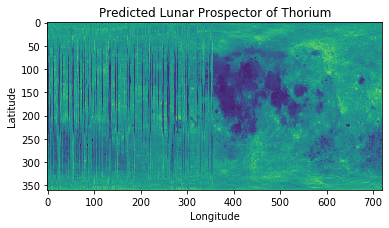

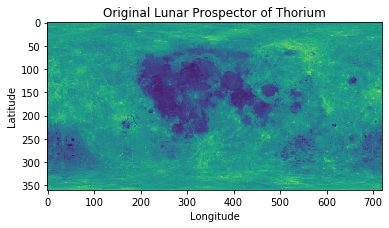

In [47]:
#reading the data
lpth = pd.read_csv('LPTh_Map.csv',header = None)
albedodf = pd.read_csv('Albedo_Map.csv',header = None)
#Transposing the data
print("Previous Shape: ",lpth.shape)
lpth = lpth.transpose()
print("New Shape:",lpth.shape)
print("Previous Shape: ",albedodf.shape)
albedodf = albedodf.transpose()
print("New Shape:",albedodf.shape)
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(lpth, albedodf, test_size=0.3, random_state=42)
#initialize the model
reg = RandomForestRegressor(random_state=42)
#getting predictions
y_pred = evaluate_model(reg,X_train,y_train,X_test,y_test)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction.transpose(),'Predicted Lunar Prospector of Thorium')
plotcolormap(original.transpose(),'Original Lunar Prospector of Thorium')

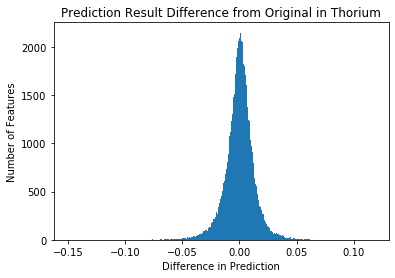

In [48]:
plot_histogram(y_pred,y_test,'Thorium')

<a id="ti11"></a>
### Using Titanium  

Previous Shape:  (360, 720)
New Shape: (720, 360)
Previous Shape:  (360, 720)
New Shape: (720, 360)
The r-squared score of the model is  0.875955198251739
The mean squared error is 0.00019933983262024866
The mean absolute error is 0.009857598790144915


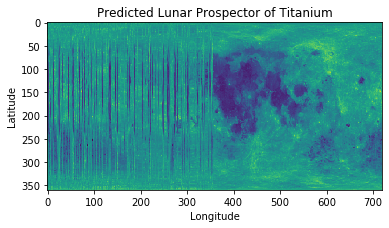

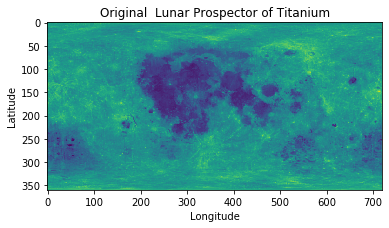

In [49]:
#reading the data
lpth = pd.read_csv('LPTi_Map.csv',header = None)
albedodf = pd.read_csv('Albedo_Map.csv',header = None)
#Transposing the data
print("Previous Shape: ",lpth.shape)
lpth = lpth.transpose()
print("New Shape:",lpth.shape)
print("Previous Shape: ",albedodf.shape)
albedodf = albedodf.transpose()
print("New Shape:",albedodf.shape)
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(lpth, albedodf, test_size=0.3, random_state=42)
#initialize the model
reg = RandomForestRegressor(random_state=42)
#getting predictions
y_pred = evaluate_model(reg,X_train,y_train,X_test,y_test)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction.transpose(),'Predicted Lunar Prospector of Titanium')
plotcolormap(original.transpose(),'Original  Lunar Prospector of Titanium')

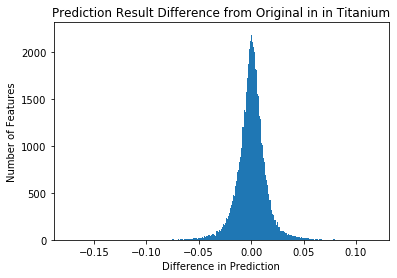

In [50]:
plot_histogram(y_pred,y_test,'in Titanium')

<a id="fe"></a>
### Using Iron

Previous Shape:  (360, 720)
New Shape: (720, 360)
Previous Shape:  (360, 720)
New Shape: (720, 360)
The r-squared score of the model is  0.8886840725905388
The mean squared error is 0.00017330046262062097
The mean absolute error is 0.009289001800626038


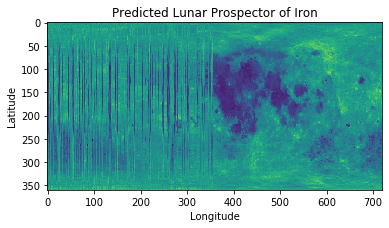

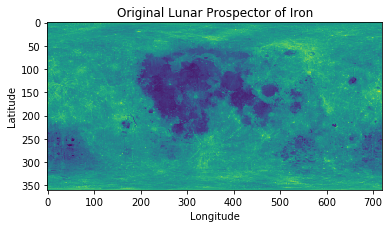

In [51]:
#reading the data
lpth = pd.read_csv('LPFe_Map.csv',header = None)
albedodf = pd.read_csv('Albedo_Map.csv',header = None)
#Transposing the data
print("Previous Shape: ",lpth.shape)
lpth = lpth.transpose()
print("New Shape:",lpth.shape)
print("Previous Shape: ",albedodf.shape)
albedodf = albedodf.transpose()
print("New Shape:",albedodf.shape)
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(lpth, albedodf, test_size=0.3, random_state=42)
#initialize the model
reg = RandomForestRegressor(random_state=42)
#getting predictions
y_pred = evaluate_model(reg,X_train,y_train,X_test,y_test)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction.transpose(),'Predicted Lunar Prospector of Iron')
plotcolormap(original.transpose(),'Original Lunar Prospector of Iron')

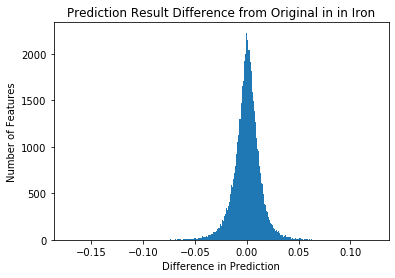

In [52]:
plot_histogram(y_pred,y_test,'in Iron')

<a id="k"></a>
### Using Potassium

Previous Shape:  (360, 720)
New Shape: (720, 360)
Previous Shape:  (360, 720)
New Shape: (720, 360)
The r-squared score of the model is  0.8885427605594604
The mean squared error is 0.00017571003608161408
The mean absolute error is 0.009305479964999627


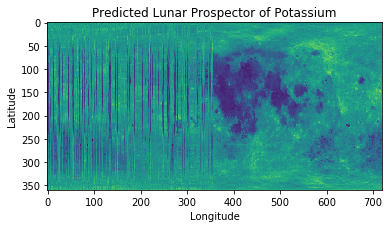

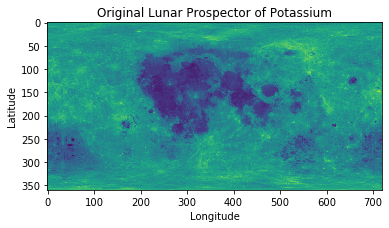

In [53]:
#reading the data
lpth = pd.read_csv('LPK_Map.csv',header = None)
albedodf = pd.read_csv('Albedo_Map.csv',header = None)
#Transposing the data
print("Previous Shape: ",lpth.shape)
lpth = lpth.transpose()
print("New Shape:",lpth.shape)
print("Previous Shape: ",albedodf.shape)
albedodf = albedodf.transpose()
print("New Shape:",albedodf.shape)
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(lpth, albedodf, test_size=0.3, random_state=42)
#initialize the model
reg = RandomForestRegressor(random_state=42)
#getting predictions
y_pred = evaluate_model(reg,X_train,y_train,X_test,y_test)
#append training data to get full image
prediction = y_train.append(pd.DataFrame(y_pred)).sort_index()
original = y_train.append(pd.DataFrame(y_test)).sort_index()
#ploting the full image
plotcolormap(prediction.transpose(),'Predicted Lunar Prospector of Potassium')
plotcolormap(original.transpose(),'Original Lunar Prospector of Potassium')

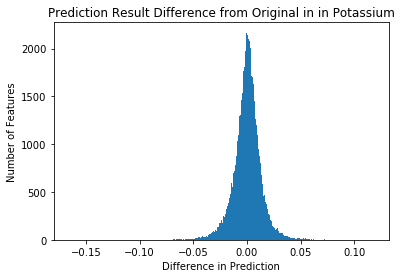

In [54]:
plot_histogram(y_pred,y_test,'in Potassium')

<a id="rr11"></a>
## Overall Result of Task-1 

* The Random Forest Algorithm perform pretty well for this task.I am getting Average r2 score of 0.8862 and Average mean squared error of 0.000179.
* There are some in noise in the prediction will be removed if we train our Machine Learning Algorithm on Larger dataset.

<a id="task2"></a>

# TASK2
The MESSENGER spacecraft mapped Mercury’s surface from 2011 to 2015, including making full-surface albedo maps and partial element maps.For Mercury the albedo map is split into the top and bottom of the planet (mercury-albedo-top-half.png.csv and mercury-albedo_resized_botton-half.png.csv).Train your model on the top half. Training should attempt to identify relationships
between albedo and chemistry. Chemical maps are:

* alsimap_smooth (Al to Si element ratio),
* casimap_smooth (Ca to Si element ratio),
* fesimap_smooth (Fe to Si element ratio),
* mgsimap_smooth (Mg to Si element ratio),
* ssimap_smooth (S to Si element ratio),

Then, make a prediction about chemical composition for the bottom half of the planet using the albedo Compare your albedo prediction to the albedo map. How did your algorithm perform? Choose a metric to quantify your performance.

## Data Loading
<a id="dl21"></a>

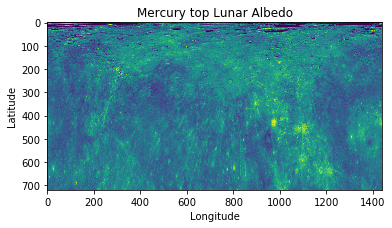

In [55]:
albedo_top = pd.read_csv('mercury-albedo-top-half.png.csv',header=None)
plotcolormap(albedo_top,'Mercury top Lunar Albedo')

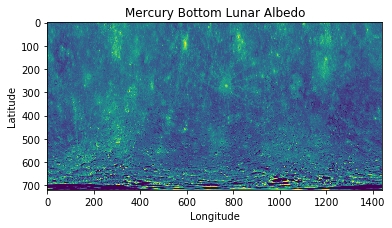

In [56]:
albedo_bottom = pd.read_csv('mercury-albedo-resized-bottom-half.png.csv',header=None)
plotcolormap(albedo_bottom,'Mercury Bottom Lunar Albedo')

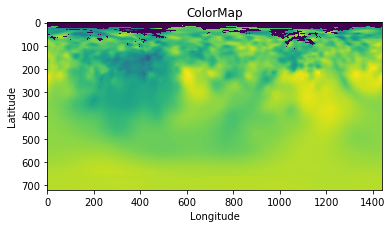

In [57]:
alsi_df = pd.read_csv('alsimap_smooth_032015.png.csv',header=None)
plotcolormap(alsi_df)

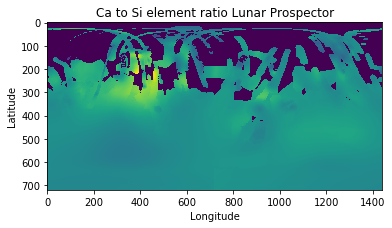

In [58]:
casi_df = pd.read_csv('casimap_smooth_032015.png.csv',header=None)
plotcolormap(casi_df,'Ca to Si element ratio Lunar Prospector')

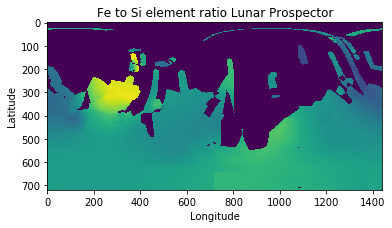

In [59]:
fesi_df = pd.read_csv('fesimap_smooth_032015.png.csv',header=None)
plotcolormap(fesi_df,'Fe to Si element ratio Lunar Prospector')

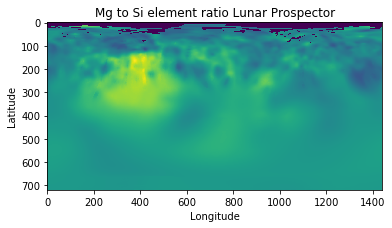

In [60]:
mgsi_df = pd.read_csv('mgsimap_smooth_032015.png.csv',header=None)
plotcolormap(mgsi_df,'Mg to Si element ratio Lunar Prospector')

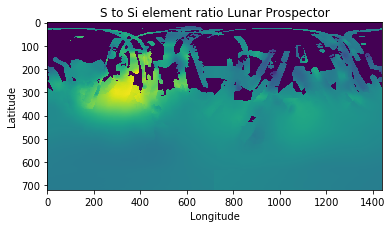

In [61]:
ssi_df = pd.read_csv('ssimap_smooth_032015.png.csv',header=None)
plotcolormap(ssi_df,'S to Si element ratio Lunar Prospector')

<a id="dw21"></a>
## Data Wrangling

Unlike the moon albedo where we are able to see the co-releation betwwen Lunar Albedo and Chemical maps there are no direct co-relation in these maps but casimap_smooth (Ca to Si element ratio), fesimap_smooth (Fe to Si element ratio),ssimap_smooth (S to Si element ratio) are very much releated to one other.

<a id="pr21"></a>
## Applying Machine Learing and Predicting the Result
In this task i am directly using the Transpose Approach with  KNeighborsRegressor which  perform pretty well on this data compare to others.

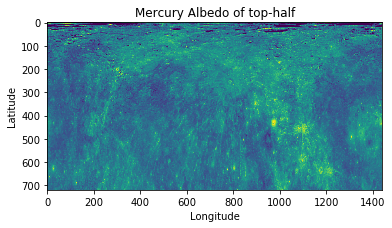

In [62]:
albedo_top = pd.read_csv('mercury-albedo-top-half.png.csv',header=None)
plotcolormap(albedo_top,'Mercury Albedo of top-half')

<a id="alsi"></a>
### Using alsimap_smooth (Al to Si element ratio)

Previous Shape:  (720, 1440)
New Shape: (1440, 720)
Previous Shape:  (720, 1440)
New Shape: (1440, 720)


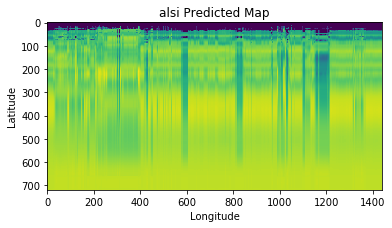

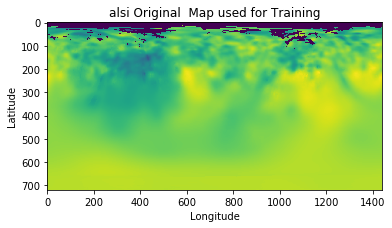

In [63]:
#transposing the data
print("Previous Shape: ",albedo_top.shape)
albedo_top = albedo_top.transpose()
print("New Shape:",albedo_top.shape)
print("Previous Shape: ",alsi_df.shape)
alsi_df = alsi_df.transpose()
print("New Shape:",alsi_df.shape)
#initialize the model
clf = KNeighborsRegressor()
clf.fit(albedo_top,alsi_df)
#getting predictions
y_pred = clf.predict(albedo_bottom.transpose())
#color map of predictions
plotcolormap(y_pred.transpose(),'alsi Predicted Map')
plotcolormap(alsi_df.transpose(),'alsi Original  Map used for Training')

<a id="casi"></a>
### Using casimap_smooth (Ca to Si element ratio)

Previous Shape:  (720, 1440)
New Shape: (1440, 720)


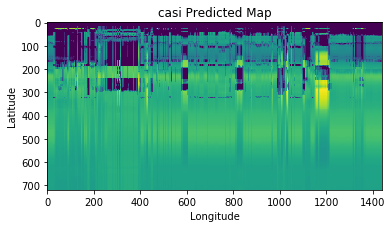

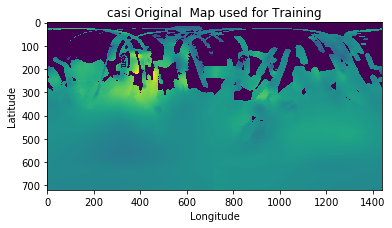

In [64]:
#transposing the data
print("Previous Shape: ",casi_df.shape)
casi_df = casi_df.transpose()
print("New Shape:",casi_df.shape)
#initialize the model
clf = KNeighborsRegressor()
clf.fit(albedo_top,casi_df)
#getting predictions
y_pred = clf.predict(albedo_bottom.transpose())
#color map of predictions
plotcolormap(y_pred.transpose(),'casi Predicted Map')
plotcolormap(casi_df.transpose(),'casi Original  Map used for Training')

<a id="fesi"></a>
### Using fesimap_smooth (Fe to Si element ratio)

Previous Shape:  (720, 1440)
New Shape: (1440, 720)


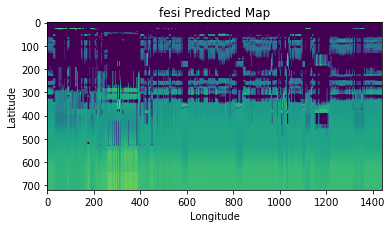

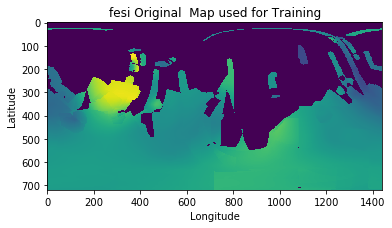

In [65]:
#transposing the data
print("Previous Shape: ",fesi_df.shape)
fesi_df = fesi_df.transpose()
print("New Shape:",fesi_df.shape)
#initialize the model
clf = KNeighborsRegressor()
clf.fit(albedo_top,fesi_df)
#getting predictions
y_pred = clf.predict(albedo_bottom.transpose())
#color map of predictions
plotcolormap(y_pred.transpose(),'fesi Predicted Map')
plotcolormap(fesi_df.transpose(),'fesi Original  Map used for Training')

<a id="mgsi"></a>
### Using mgsimap_smooth (Mg to Si element ratio)


Previous Shape:  (720, 1440)
New Shape: (1440, 720)


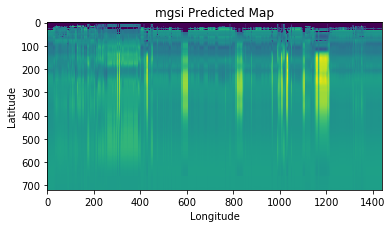

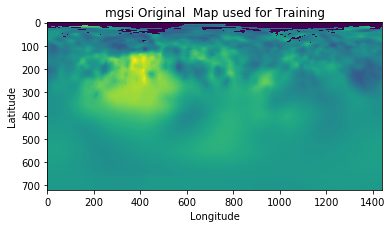

In [66]:
#transposing the data
print("Previous Shape: ",mgsi_df.shape)
mgsi_df = mgsi_df.transpose()
print("New Shape:",mgsi_df.shape)
#initialize the model
clf = KNeighborsRegressor()
clf.fit(albedo_top,mgsi_df)
#getting predictions
y_pred = clf.predict(albedo_bottom.transpose())
#color map of predictions
plotcolormap(y_pred.transpose(),'mgsi Predicted Map')
plotcolormap(mgsi_df.transpose(),'mgsi Original  Map used for Training')

<a id="ssi"></a>
### Using ssimap_smooth (S to Si element ratio)

Previous Shape:  (720, 1440)
New Shape: (1440, 720)


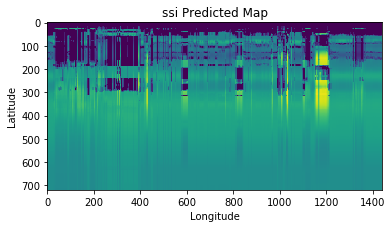

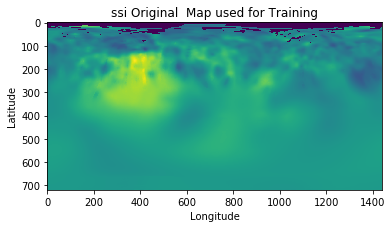

In [67]:
#transposing the data
print("Previous Shape: ",ssi_df.shape)
ssi_df = ssi_df.transpose()
print("New Shape:",ssi_df.shape)
#initialize the model
clf = KNeighborsRegressor()
clf.fit(albedo_top,ssi_df)
#getting predictions
y_pred = clf.predict(albedo_bottom.transpose())
#color map of predictions
plotcolormap(y_pred.transpose(),'ssi Predicted Map')
plotcolormap(mgsi_df.transpose(),'ssi Original  Map used for Training')

<a id="rr21"></a>
## Overall Result of Task-2

Maps Produce in this Task are not very great but it will improve by using larger dataset.Perfomance Measurement for Task-2 can't be done because i have used chemical map,albedo top for training as given in the first part.So i don't have anything to compare with.If the bottom chemical composition is available then only i can measure the performance.

<a id="q"></a>
# Problem Faced

Dataset was available in Limited Quantity so the Machine Learning Algorithms are not able to predict better.

I have some difficulty in Understanding the tasks and especially in task-2 i don't have true images to compare performance.

There is still room for improvement like using K-Fold,Hyper Parameter Tuning and Ensemble Regressor but these techniques takes a lot of time in training time.Neural Networks can also be used for this but i need larger dataset for that.